# Koodauspaja, harjoitus 2
# Kimble

Resonanssin opiskelijahuoneella on kerätty dataa Kimble-lautapelin nopanheitoista. Noppaa heitetään pop-o-matic-laitteen avulla, missä noppa pysyy muovikuvun sisällä. Nopan odotettu käytös on sama kuin vapaasti liikkuvan nopan. Testataan, pitääkö hypoteesi paikkansa.

## 1.1 Datan lukeminen ja käsittely

Lue koodiin taulukko tiedostosta 'kimble_tulos.csv'. Taulukko pitää sisällään kuusi saraketta ja kuusi riviä. sarake kuvaa ns. nykyistä nopan silmälukua ja rivi kuvaa kuinka monta kertaa luku esiintyi sarakkeen luvun jälkeen. Esim. sarakkeen '1' voisi lukea: "Ykkösen jälkee ykkönen tuli 39 kertaa, kakkonen 54 kertaa, kolmonen 50 kertaa jne."

Vinkki: Taulukko pitää nyt sisällään tiedon sarakkeidein ja rivien nimistä. Tämän takia `pd.read_csv` tarvitsee argumentit `header` ja `index_col`.

In [2]:
import numpy as np
import pandas as pd

# Nopan silmäluvut
noppa = np.array([1, 2, 3, 4, 5, 6])

# Lue tiedosto, huomioi header (ensimmäinen rivi) ja indeksi (ensimmäinen sarake)
df = pd.read_csv("kimble_tulos.csv", header=0, index_col=0)

df

,1,2,3,4,5,6
1,39,49,63,56,49,91
2,54,25,36,50,82,33
3,50,40,30,99,49,40
4,67,38,96,32,53,46
5,45,92,51,39,38,61
6,93,36,33,56,53,26


## 1.2 Todennäköisyystaulukko

Luo nyt myös taulukko, jossa esiintymismäärien sijaan soluissa on todennäköisyys.

Vinkki: `df.sum()` palauttaa summan sarakkeiden arvoista

In [3]:
# Mitatut esiintymistodennäköisyydet
df_norm = df / df.sum()

df_norm

,1,2,3,4,5,6
1,0.112069,0.175000,0.203883,0.168675,0.151235,0.306397
2,0.155172,0.089286,0.116505,0.150602,0.253086,0.111111
3,0.143678,0.142857,0.097087,0.298193,0.151235,0.134680
4,0.192529,0.135714,0.310680,0.096386,0.163580,0.154882
5,0.129310,0.328571,0.165049,0.117470,0.117284,0.205387
6,0.267241,0.128571,0.106796,0.168675,0.163580,0.087542


## 1.3 Odotettu taulukko

Luvut eivät ainakaan näytä jakautuvan tasaisesti, vaikka olettaisimme nopan käyttäytyvän täysin satunnaisesti. Tee 'odotettu' taulukko, joka on muodoltaan samanlainen kuin alkuperäinen, mutta jossa luvut ovat tasaisesti jakautuneet. Esim. odotetun taulukon sarake '1' on 1/6 kertaa tiedoston taulukon sarakkeen '1' lukujen summa. 

HUOM. Saat vain yhden luvun, mutta täytä taulukko saman muotoiseksi kuin alkuperäinen.

Vinkki: Voi olla helpompaa muodostaa Numpy-taulukko, jonka avulla luot DataFramen.

In [5]:
# Muodosta odotettu taulukko
summa = 1/6 * df.sum(axis=0)
odotettu = np.zeros(shape=(6,6))

# Täytä taulukko odotetuilla arvoilla
for rivi in range(6):
    odotettu[:, rivi] = summa[rivi]

# Luo DataFrame arvoista
odotettu = pd.DataFrame(odotettu, columns=list(map(str, noppa)), index=list(map(str, noppa)))
odotettu.head()

,1,2,3,4,5,6
1,58.0,46.666667,51.5,55.333333,54.0,49.5
2,58.0,46.666667,51.5,55.333333,54.0,49.5
3,58.0,46.666667,51.5,55.333333,54.0,49.5
4,58.0,46.666667,51.5,55.333333,54.0,49.5
5,58.0,46.666667,51.5,55.333333,54.0,49.5


## 2.1 Taulukoiden vertailu

Sinulla on nyt kaksi taulukkoa, mitatut ja odotetut arvot. Lukuja on OK-kiva katsella, mutta kuvaajia on kivempi. Muodosta aluksi histogrammi-kuvaaja vain sarakkeesta "1". Kuvaajassa tulisi siis näkyä kuinka usein mikäkin luku seurasi lukua "1". Piirrä myös punainen katkoviiva odotetun todennäköisyyden kohdalle.

Vinkki: matplotibin `plt.bar(x, y)` on tähän sopiva. `plt.hlines(y, x_lower, x_upper)` piirtää y:n arvon x_lowerista x_upperiin

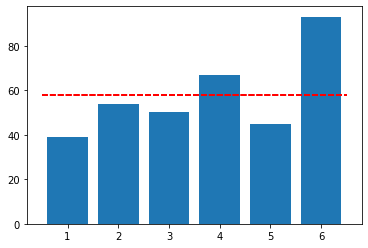

In [8]:
import matplotlib.pyplot as plt

plt.bar(noppa, df["1"])
plt.xticks(noppa)
plt.hlines(odotettu["1"], 0.5, 6.5, color="red", linestyle="dashed")

## 2.2 Kaikki kuvaajat

Muodosta nyt jokaiselle silmäluvulle samanlainen histogrammi kuin kohdassa 2.1 samaan kuvaajaan matplotlibin `plt.subplots()` avulla.

Vinkki: Kuvaajien ulkonäköä voi parantaa kutsu `fig.tigt_layout()`, kun olet määritellyt 

    fig, ax = plt.subplots(3, 2, sharex=True)

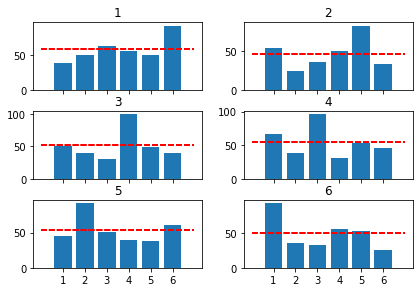

In [7]:
# Alusta kuvaaja
fig, ax = plt.subplots(3, 2, sharex=True)
fig.tight_layout()

# Piirrä kuvaaja
for rivi in range(3):
    for sarake in range(2):
        indeksi = rivi*2 + sarake
        ax[rivi, sarake].bar(noppa, df.iloc[indeksi])
        ax[rivi, sarake].set_xticks(noppa)
        ax[rivi, sarake].set_title(str(noppa[indeksi]))
        ax[rivi, sarake].hlines(odotettu[str(indeksi+1)], 0, 7, color="red", linestyle="dashed")

plt.show()

### 2.3 2D-kuvaajat ja Seaborn

Kuusi erillistä histogrammi näyttää hyvin mitatun datan ketjut. Kyseessä on kuitenkin 2D-dataa, joten kuuden yksittäisen histogrammin sijaan voisimme tehdä yhden heatmap-kuvaajan, jossa x-akselilla on nykyinen silmäluku ja y-akselilla tuleva silmäluku. Kuvaajassa olisi jokaisen pisteen kohdalla väri, jonka 'vahvuus' kuvaa todennäköisyyttä.

Matplotlibissä heatmapin saa tehtyä esim. `plt.imshow()`. Piirrä Matplotlibin avulla heatmap, johon on myös kirjoitettu todennäköisyydet värien päälle (katso [täältä](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) apua)

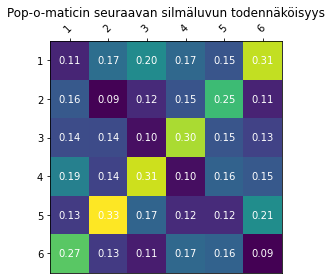

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(df_norm)

# Kirjoita x- ja y-akseleille nopan silmäluvut
ax.set_xticks(np.arange(6), labels=noppa)
ax.xaxis.tick_top()
ax.set_yticks(np.arange(6), labels=noppa)

# Pyöräytä x-akselin silmäluvut hienostelun takia
plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")

# Lisää todennäköisyydet kuvaan
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, f"{df_norm.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

ax.set_title("Pop-o-maticin seuraavan silmäluvun todennäköisyys")

fig.tight_layout()
plt.show()

Yllä olevan kuvaajan tuotto on Matplotlibillä suhteellisen työlästä. Vähentääksesi työn määrää voit käyttää Seaborn-kirjastoa. Seaborn on Matplotlibin päälle rakennettu kirjasto, joka tekee kuvaamisesta helpompaa. Seabornin heatmap-kuvaaja on [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) ja Matplotlibiä vastaavan kuvaajan pystyy tuottamaan muutamalla rivillä.

Seabornin saa asennettua terminaalikomennolla:

    pip install seaborn

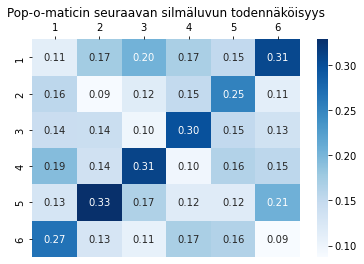

In [43]:
import seaborn as sns
ax = sns.heatmap(df_norm, annot=True, fmt=".2f", cmap="Blues")
ax.xaxis.tick_top()
ax.set_title("Pop-o-maticin seuraavan silmäluvun todennäköisyys")
plt.show()

## Bonus: 3. Numeerinen vertailu

Mittaustulokset poikkeavat selvästi odotetusta, mutta _tieteellinen tutkimus_ vaatii usein tarkemman käsittelyn kuin pelkät kuvaajat. Jakaumien samankaltaisuutta pystyy vertaamaan esim. $\chi^2$-testillä. Testin tarkempaa toimintaa sinun ei tarvitse tietää, mutta testin perusajatuksena on se, että jos jakaumat ovat samankaltaisia, niin testin tulos on pieni. Jos jakaumat ovat erilaisia, niin testin tulos on suuri. Testi palauttaa myös p-arvon, joka kertoo kuinka todennäköistä on, että jakaumat ovat samankaltaisia. Jos p-arvo on pieni, niin jakaumat ovat todennäköisesti erilaisia. Jos p-arvo on suuri, niin jakaumat ovat todennäköisesti samankaltaisia. P-arvo saa arvon väliltä 0-1.

Testaa jakaumien samankaltaisuutta $\chi^2$-testillä. Tulosta testin tulos ja p-arvo. $\chi^2$-testi löytyy Scipy-kirjastosta [`scipy.stats.chisquare()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html).

In [55]:
from scipy.stats import chisquare

# Tee testi sarakkeille
chi2_s, p_s = chisquare(df, odotettu)

# Tee testi koko datalle
chi2, p = chisquare(df.values.flatten(), odotettu.values.flatten())

# Tulosta tulokset
chi2_s, p_s, chi2, p

(array([33.03448276, 59.21428571, 61.31067961, 49.65060241, 20.22222222,
        56.19191919]),
 array([3.70456120e-06, 1.76624618e-11, 6.51253725e-12, 1.63373543e-09,
        1.13522766e-03, 7.41964044e-11]),
 279.6241919083369,
 6.357580116382698e-40)